In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.datasets import cifar10

**Importation de dataset**

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [3]:
class_names = ['avion', 'automobile', 'oiseau', 'chat', 'cerf',
               'chien', 'grenouille', 'cheval', 'bateau', 'camion']

In [4]:
y_train, y_test = y_train.flatten(), y_test.flatten()

**Visualisation des données**

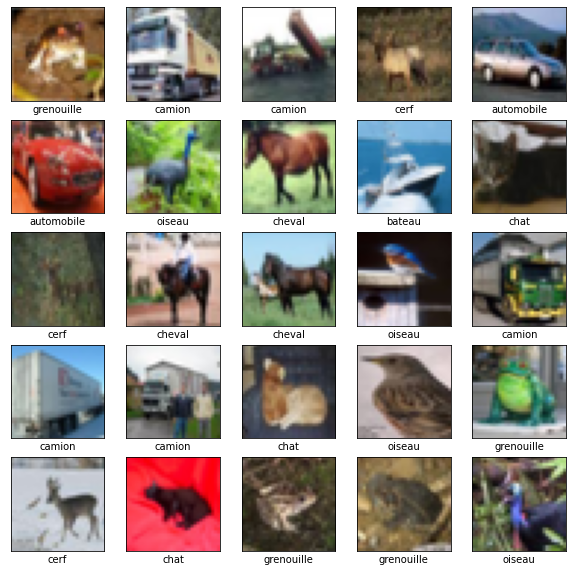

In [5]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

**PROCESSING**

In [6]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [7]:
X_train.shape

(50000, 32, 32, 3)

**CONSTRUCTION DU MODELE**

In [8]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))



model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))


model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))



model.add( Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add( Dense(10, activation='softmax'))

**COMPILATION DU MODELE**

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#from joblib import dump, load
#dump(model, '/content/drive/MyDrive/Modèle/modelcifar10.joblib') 

INFO:tensorflow:Assets written to: ram://1215600c-c05e-4a63-941f-207d7968837f/assets


['/content/drive/MyDrive/Modèle/modelcifar10.joblib']

In [ ]:
# Récupération du modèle
#Modele_cifar = load("/content/drive/MyDrive/Modèle/modelcifar10.joblib")

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

**ENTRAINEMENT DU MODELE**

In [ ]:
history = model.fit(X_train, y_train, epochs=20, 
                    validation_data=(X_test, y_test))

Epoch 1/20
1563/1563 [==============================] - 519s 331ms/step - loss: 1.4278 - accuracy: 0.5140 - val_loss: 0.9933 - val_accuracy: 0.6512
Epoch 2/20
1563/1563 [==============================] - 488s 312ms/step - loss: 0.9512 - accuracy: 0.6742 - val_loss: 0.7931 - val_accuracy: 0.7260
Epoch 3/20
1563/1563 [==============================] - 484s 309ms/step - loss: 0.7796 - accuracy: 0.7359 - val_loss: 0.7321 - val_accuracy: 0.7568
Epoch 4/20
1563/1563 [==============================] - 485s 310ms/step - loss: 0.6575 - accuracy: 0.7784 - val_loss: 0.6986 - val_accuracy: 0.7689
Epoch 5/20
1563/1563 [==============================] - 489s 313ms/step - loss: 0.5646 - accuracy: 0.8092 - val_loss: 0.6160 - val_accuracy: 0.7999
Epoch 6/20
1563/1563 [==============================] - 484s 310ms/step - loss: 0.4807 - accuracy: 0.8352 - val_loss: 0.6303 - val_accuracy: 0.7982
Epoch 7/20
1563/1563 [==============================] - 481s 308ms/step - loss: 0.4039 - accuracy: 0.8627 - val_

**VISUALISATION DE LA COURBE D'APPRENTISSAGE**

313/313 - 22s - loss: 0.8340 - accuracy: 0.8276 - 22s/epoch - 72ms/step


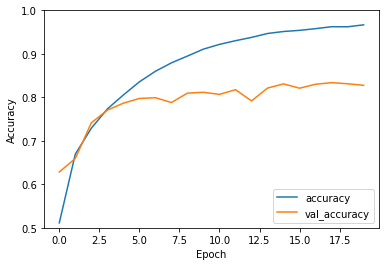

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

**PREDICTION SUR LE JEU DE TEST**

In [ ]:
p_test = model.predict(X_test).argmax(axis=1)

**STOCKAGE DES ERREURS DE PREDICTION**

In [ ]:
erreur_idx = np.where(p_test != y_test)[0]

**AFFICHAGE ALEATOIRE D'UNE ERREUR**

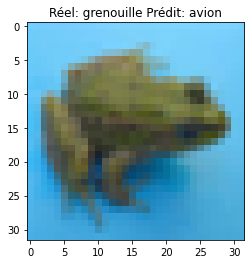

In [ ]:
i = np.random.choice(erreur_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title("Réel: %s Prédit: %s" % (class_names[y_test[i]], class_names[p_test[i]]));